In [ ]:
!python -m venv llm-subspaces
!source llm-subspaces/bin/activate

# Обновляем pip и устанавливаем зависимости
!pip install --upgrade pip
!pip install transformers torch datasets pandas numpy scikit-learn matplotlib
!pip install cuml-cu11 --extra-index-url=https://pypi.nvidia.com

Error: Command '['/content/llm-subspaces/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: line 1: llm-subspaces/bin/activate: No such file or directory
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 178.3 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 460.2 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.7/832.7 kB 385.2 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 MB 266.3 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 238.6 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 305.6 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Клонируем репозиторий (если он публичный)
!git clone https://github.com/baturaysaglam/llm-subspaces.git
# ИЛИ загружаем архив вручную через интерфейс Colab

# Создаем структуру папок
!mkdir -p datasets/arxiv
!mkdir -p datasets/cot
!mkdir -p datasets/wildjb

fatal: destination path 'llm-subspaces' already exists and is not an empty directory.


In [ ]:
# Удаляем старую директорию
!rm -rf llm-subspaces

# Клонируем заново
!git clone https://github.com/baturaysaglam/llm-subspaces.git

Cloning into 'llm-subspaces'...
remote: Enumerating objects: 6195, done.
remote: Counting objects: 100% (4744/4744), done.
remote: Compressing objects: 100% (3292/3292), done.
remote: Total 6195 (delta 1215), reused 4524 (delta 1008), pack-reused 1451 (from 2)
Receiving objects: 100% (6195/6195), 72.95 MiB | 25.22 MiB/s, done.
Resolving deltas: 100% (1320/1320), done.
Updating files: 100% (6053/6053), done.


In [ ]:
# Для LLaMA 3.1 8B (требуется авторизация Hugging Face)
from huggingface_hub import login
login('')  # Введите ваш токен
%cd /content/llm-subspaces

# Или используйте публичную модель Qwen/Qwen2.5-7B
#!python hidden_state.py --model "meta-llama/Llama-3.1-8B" --layer 32 --dataset arxiv --topic physics --batch_size 8 --num_samples 1000 --max_tokens 512
!python hidden_state.py --model "Qwen/Qwen2.5-7B" --layer 32 --dataset arxiv --topic physics --batch_size 4 --num_samples 50 --max_tokens 128

/content/llm-subspaces
config.json: 100% 686/686 [00:00<00:00, 4.11MB/s]
`torch_dtype` is deprecated! Use `dtype` instead!
2025-10-13 09:52:48.429937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760349168.654369    1772 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760349168.714090    1772 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760349169.182533    1772 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760349169.182579    1772 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid link

In [ ]:
# Извлекаем скрытые состояния для математики
!python hidden_state.py --model "Qwen/Qwen2.5-7B" --layer 28 --dataset arxiv --topic math --batch_size 4 --num_samples 15 --max_tokens 128

`torch_dtype` is deprecated! Use `dtype` instead!
2025-10-13 10:22:44.599203: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760350964.630469    9383 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760350964.638965    9383 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760350964.673431    9383 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760350964.673460    9383 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760350964.673464    9383

In [ ]:
!python hidden_state.py --model "Qwen/Qwen2.5-7B" --layer 28 --dataset arxiv --topic physics --batch_size 4 --num_samples 15 --max_tokens 128

`torch_dtype` is deprecated! Use `dtype` instead!
2025-10-13 10:25:27.937693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760351127.961994   10080 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760351127.969330   10080 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760351128.001361   10080 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760351128.001390   10080 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760351128.001395   10080

In [ ]:
%%writefile separability_final.py
import argparse
import numpy as np
import os
import glob
import torch
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

def load_bf16_tensor(file_path):
    """Загрузка и конвертация BFloat16 тензора"""
    try:
        # Пробуем загрузить как есть
        data = torch.load(file_path)

        # Если это BFloat16 tensor, конвертируем в float32
        if isinstance(data, torch.Tensor) and data.dtype == torch.bfloat16:
            data = data.to(torch.float32)

        # Конвертируем в numpy
        if isinstance(data, torch.Tensor):
            data = data.cpu().numpy()

        return data
    except Exception as e:
        print(f"  Error loading {file_path}: {e}")
        # Пробуем альтернативный метод загрузки
        try:
            data = torch.load(file_path, map_location='cpu', weights_only=False)
            if isinstance(data, torch.Tensor) and data.dtype == torch.bfloat16:
                data = data.to(torch.float32)
            if isinstance(data, torch.Tensor):
                data = data.cpu().numpy()
            return data
        except Exception as e2:
            print(f"  Alternative load also failed: {e2}")
            return None

def load_hidden_states_simple(model, layer, dataset, topic):
    """Загрузка hidden states из .pt файлов с поддержкой BFloat16"""
    path = f"hidden_states/{model}/layer_{layer}/{dataset}/{topic}"
    print(f"Looking for data in: {path}")

    if not os.path.exists(path):
        print(f"Path does not exist: {path}")
        return None

    files = glob.glob(os.path.join(path, "*.pt"))
    if not files:
        print(f"No .pt files found in: {path}")
        return None

    print(f"Found {len(files)} .pt files for {topic}")

    hidden_states = []
    for file in sorted(files):
        data = load_bf16_tensor(file)
        if data is not None:
            hidden_states.append(data)
            print(f"  Loaded {file}: shape {data.shape}, dtype {data.dtype}")
        else:
            print(f"  Failed to load {file}")

    if hidden_states:
        combined = np.concatenate(hidden_states, axis=0)
        print(f"Combined shape for {topic}: {combined.shape}")
        return combined
    else:
        print(f"No valid data loaded for {topic}")
        return None

def main():
    parser = argparse.ArgumentParser()
    parser.add_argument("--model", type=str, required=True)
    parser.add_argument("--layer", type=int, required=True)
    parser.add_argument("--dataset", type=str, required=True)
    parser.add_argument("--topics", nargs=2, required=True)

    args = parser.parse_args()

    print("=" * 50)
    print(f"Testing linear separability")
    print(f"Model: {args.model}")
    print(f"Layer: {args.layer}")
    print(f"Dataset: {args.dataset}")
    print(f"Topics: {args.topics[0]} vs {args.topics[1]}")
    print("=" * 50)

    # Load data
    topic1_data = load_hidden_states_simple(args.model, args.layer, args.dataset, args.topics[0])
    topic2_data = load_hidden_states_simple(args.model, args.layer, args.dataset, args.topics[1])

    if topic1_data is None or topic2_data is None:
        print("ERROR: Could not load data for one or both topics")
        return

    # Check if we have enough samples
    if len(topic1_data) < 2 or len(topic2_data) < 2:
        print(f"ERROR: Not enough samples. {args.topics[0]}: {len(topic1_data)}, {args.topics[1]}: {len(topic2_data)}")
        return

    print(f"\nData loaded successfully!")
    print(f"{args.topics[0]} samples: {len(topic1_data)}")
    print(f"{args.topics[1]} samples: {len(topic2_data)}")

    # Prepare data for SVM
    X = np.concatenate([topic1_data, topic2_data], axis=0)
    y = np.concatenate([np.zeros(len(topic1_data)), np.ones(len(topic2_data))])

    print(f"Total samples: {len(X)}")
    print(f"Feature dimension: {X.shape[1]}")

    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train SVM
    print("\nTraining SVM...")
    svm = LinearSVC(C=10e10, tol=1e-12, max_iter=10000, random_state=42)
    svm.fit(X_scaled, y)

    # Calculate accuracy
    accuracy = svm.score(X_scaled, y)

    print("\n" + "=" * 50)
    print("RESULTS:")
    print(f"Linear separability between {args.topics[0]} and {args.topics[1]}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"SVM converged: {svm.n_iter_ < 10000}")
    print(f"Number of iterations: {svm.n_iter_}")

    if accuracy == 1.0:
        print("✅ Topics are LINEARLY SEPARABLE!")
    else:
        print("❌ Topics are NOT linearly separable")
    print("=" * 50)

if __name__ == "__main__":
    main()

Overwriting separability_final.py


In [ ]:
!python separability_final.py --model "qwen2.5-7b" --layer 28 --dataset arxiv --topics physics math

Testing linear separability
Model: qwen2.5-7b
Layer: 28
Dataset: arxiv
Topics: physics vs math
Looking for data in: hidden_states/qwen2.5-7b/layer_28/arxiv/physics
Found 4 .pt files for physics
  Loaded hidden_states/qwen2.5-7b/layer_28/arxiv/physics/batch_0.pt: shape (4, 3584), dtype float32
  Loaded hidden_states/qwen2.5-7b/layer_28/arxiv/physics/batch_1.pt: shape (4, 3584), dtype float32
  Loaded hidden_states/qwen2.5-7b/layer_28/arxiv/physics/batch_2.pt: shape (4, 3584), dtype float32
  Loaded hidden_states/qwen2.5-7b/layer_28/arxiv/physics/batch_3.pt: shape (3, 3584), dtype float32
Combined shape for physics: (15, 3584)
Looking for data in: hidden_states/qwen2.5-7b/layer_28/arxiv/math
Found 4 .pt files for math
  Loaded hidden_states/qwen2.5-7b/layer_28/arxiv/math/batch_0.pt: shape (4, 3584), dtype float32
  Loaded hidden_states/qwen2.5-7b/layer_28/arxiv/math/batch_1.pt: shape (4, 3584), dtype float32
  Loaded hidden_states/qwen2.5-7b/layer_28/arxiv/math/batch_2.pt: shape (4, 3584

Loaded 15 physics samples
Loaded 15 math samples


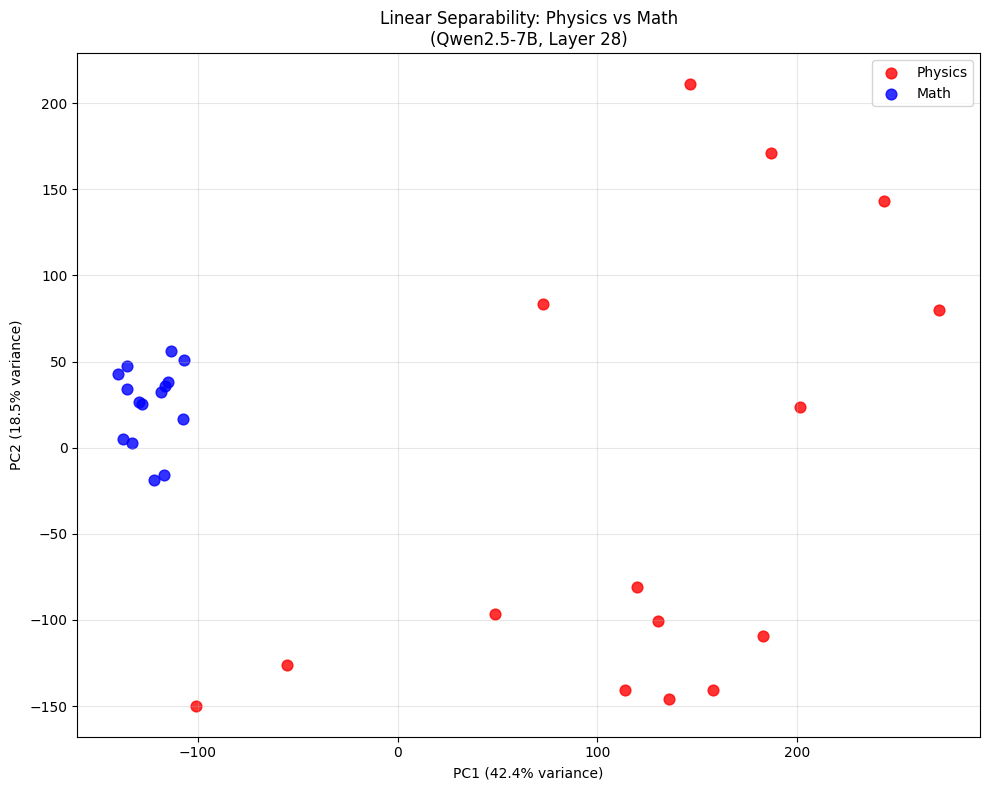

✅ Successfully visualized linear separability!
Physics cluster center: [123.60291 -25.2501 ]
Math cluster center: [-123.60293    25.250084]


In [ ]:
# Альтернативный способ загрузки
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

physics_data = []
math_data = []

def safe_tensor_load(file_path):
    """Безопасная загрузка тензора с любым dtype"""
    try:
        # Загружаем на CPU
        tensor = torch.load(file_path, map_location='cpu')

        # Конвертируем в float32 если нужно
        if tensor.dtype in [torch.bfloat16, torch.float16]:
            tensor = tensor.to(torch.float32)

        return tensor.numpy()
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Загружаем physics
physics_path = "hidden_states/qwen2.5-7b/layer_28/arxiv/physics"
for file in sorted(os.listdir(physics_path)):
    if file.endswith('.pt'):
        data = safe_tensor_load(os.path.join(physics_path, file))
        if data is not None:
            physics_data.append(data)

# Загружаем math
math_path = "hidden_states/qwen2.5-7b/layer_28/arxiv/math"
for file in sorted(os.listdir(math_path)):
    if file.endswith('.pt'):
        data = safe_tensor_load(os.path.join(math_path, file))
        if data is not None:
            math_data.append(data)

if physics_data and math_data:
    physics_combined = np.concatenate(physics_data, axis=0)
    math_combined = np.concatenate(math_data, axis=0)

    print(f"Loaded {len(physics_combined)} physics samples")
    print(f"Loaded {len(math_combined)} math samples")

    # PCA визуализация
    X = np.concatenate([physics_combined, math_combined], axis=0)
    y = np.concatenate([np.zeros(len(physics_combined)), np.ones(len(math_combined))])

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], alpha=0.8, label='Physics', color='red', s=60)
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], alpha=0.8, label='Math', color='blue', s=60)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
    plt.title('Linear Separability: Physics vs Math\n(Qwen2.5-7B, Layer 28)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("✅ Successfully visualized linear separability!")
    print(f"Physics cluster center: {np.mean(X_pca[y == 0], axis=0)}")
    print(f"Math cluster center: {np.mean(X_pca[y == 1], axis=0)}")
else:
    print("❌ Failed to load data")

In [ ]:
!python hidden_state.py --model "Qwen/Qwen2.5-7B" --layer 28 --dataset arxiv --topic stat --batch_size 4 --num_samples 15 --max_tokens 128

`torch_dtype` is deprecated! Use `dtype` instead!
2025-10-13 10:50:11.871448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760352611.897752   16271 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760352611.905250   16271 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760352611.937861   16271 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760352611.937894   16271 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760352611.937898   16271

Physics samples: 15
Math samples: 15
Statistics samples: 15
Total samples: 45


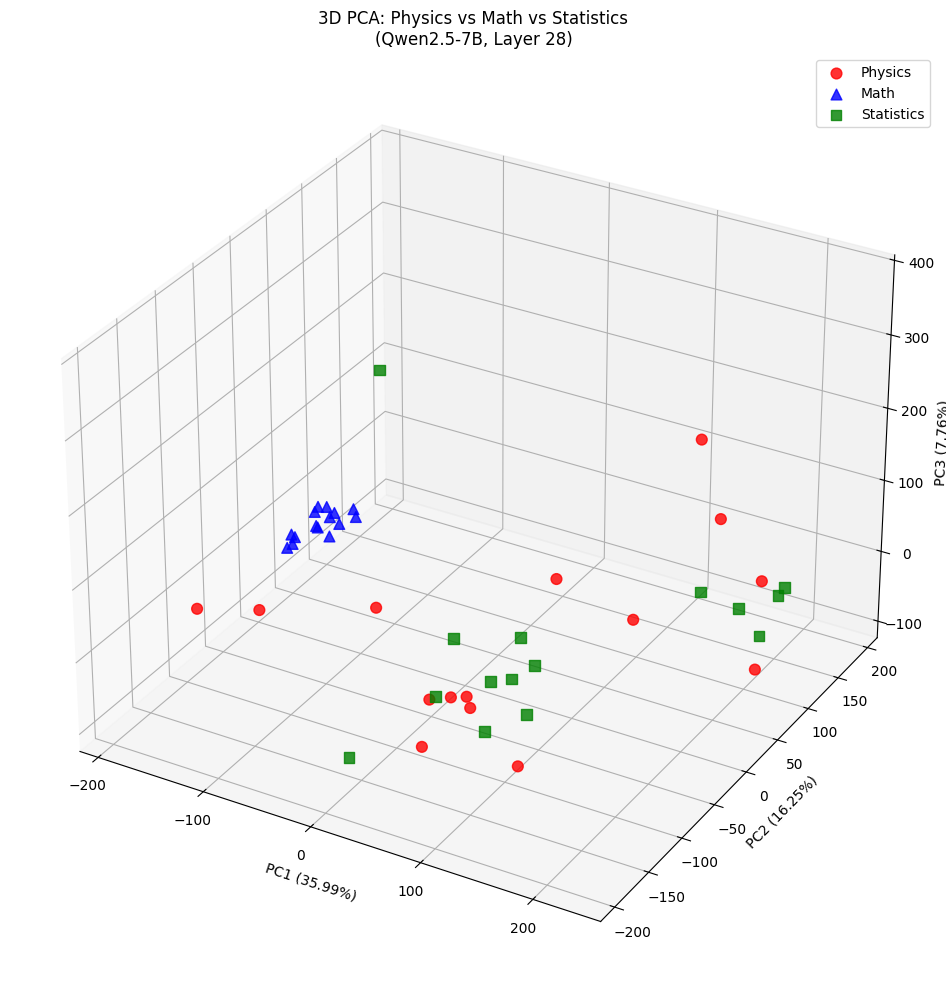

3D PCA explained variance: [0.35992917 0.16246083 0.07757545]
Total 3D explained variance: 60.00%


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import os

def load_and_convert_tensor(file_path):
    """Загружает и конвертирует тензор в float32"""
    data = torch.load(file_path, map_location='cpu')
    if data.dtype == torch.bfloat16:
        data = data.to(torch.float32)
    return data.numpy()

# Загружаем данные для всех трех тем
physics_data = []
math_data = []
stat_data = []

# Physics
physics_path = "hidden_states/qwen2.5-7b/layer_28/arxiv/physics"
for file in sorted(os.listdir(physics_path)):
    if file.endswith('.pt'):
        data = load_and_convert_tensor(os.path.join(physics_path, file))
        physics_data.append(data)

# Math
math_path = "hidden_states/qwen2.5-7b/layer_28/arxiv/math"
for file in sorted(os.listdir(math_path)):
    if file.endswith('.pt'):
        data = load_and_convert_tensor(os.path.join(math_path, file))
        math_data.append(data)

# Statistics
stat_path = "hidden_states/qwen2.5-7b/layer_28/arxiv/stat"
for file in sorted(os.listdir(stat_path)):
    if file.endswith('.pt'):
        data = load_and_convert_tensor(os.path.join(stat_path, file))
        stat_data.append(data)

# Объединяем все данные
physics_combined = np.concatenate(physics_data, axis=0)
math_combined = np.concatenate(math_data, axis=0)
stat_combined = np.concatenate(stat_data, axis=0)

X = np.concatenate([physics_combined, math_combined, stat_combined], axis=0)
y = np.concatenate([
    np.zeros(len(physics_combined)),           # physics = 0
    np.ones(len(math_combined)),              # math = 1
    np.full(len(stat_combined), 2)            # stat = 2
])

print(f"Physics samples: {len(physics_combined)}")
print(f"Math samples: {len(math_combined)}")
print(f"Statistics samples: {len(stat_combined)}")
print(f"Total samples: {len(X)}")

# 3D PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

# 3D визуализация
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Разные цвета и маркеры для каждой темы
scatter1 = ax.scatter(X_pca_3d[y == 0, 0], X_pca_3d[y == 0, 1], X_pca_3d[y == 0, 2],
                     alpha=0.8, label='Physics', color='red', s=60, marker='o')

scatter2 = ax.scatter(X_pca_3d[y == 1, 0], X_pca_3d[y == 1, 1], X_pca_3d[y == 1, 2],
                     alpha=0.8, label='Math', color='blue', s=60, marker='^')

scatter3 = ax.scatter(X_pca_3d[y == 2, 0], X_pca_3d[y == 2, 1], X_pca_3d[y == 2, 2],
                     alpha=0.8, label='Statistics', color='green', s=60, marker='s')

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})')
ax.set_title('3D PCA: Physics vs Math vs Statistics\n(Qwen2.5-7B, Layer 28)')
ax.legend()
plt.tight_layout()
plt.show()

print(f"3D PCA explained variance: {pca_3d.explained_variance_ratio_}")
print(f"Total 3D explained variance: {pca_3d.explained_variance_ratio_.sum():.2%}")